# Small World

Corresponding to Cahpter 3.8 in the book [Network Science Book](https://www.networksciencebook.com/) by Albert-László Barabási



In [ ]:
!pip install numpy pandas matplotlib networkx  

Defaulting to user installation because normal site-packages is not writeable


1000

## Small world in random network

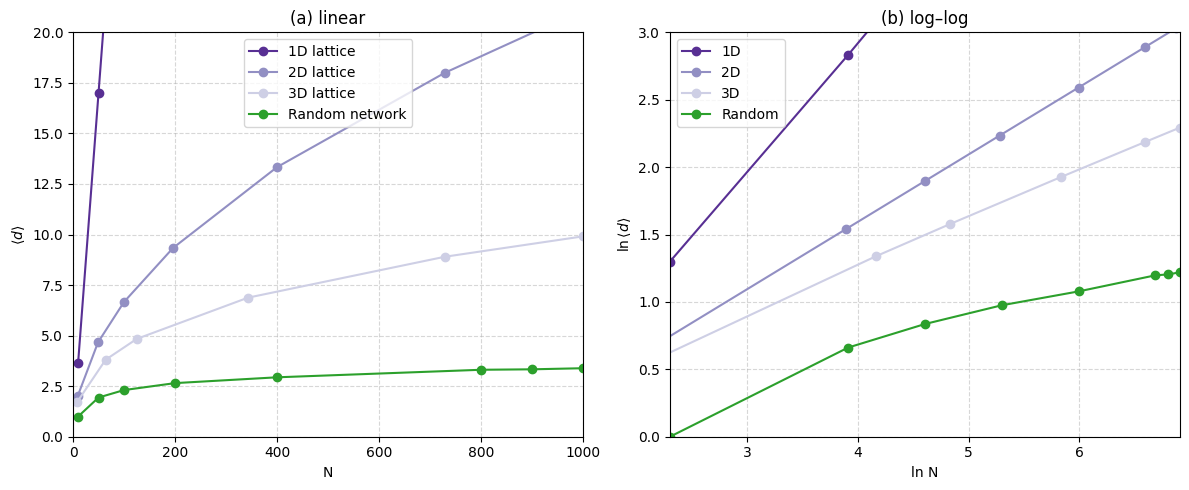

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 1) Define network sizes
# sizes_1d = [10,50, 100, 200, 400, 800, 900, 1000,3000,5000,10000]
# side_2d = [3,7, 10, 14, 20, 27, 31,50,100]
# side_3d = [2,4, 5, 7, 9, 10,15,21]


sizes_1d = [10,50, 100, 200, 400, 800, 900, 1000]
side_2d = [3,7, 10, 14, 20, 27, 31]
side_3d = [2,4, 5, 7, 9, 10]
k_rand = 9

# 2) Colors: three purples from Purples colormap, one green
cmap_p = plt.cm.Purples
colors = {
    '1d': cmap_p(0.85),
    '2d': cmap_p(0.55),
    '3d': cmap_p(0.30),
    'rand': '#2ca02c'
}

# 3) Compute ⟨d⟩
def compute_avg_distances():
    N1, d1 = [], []
    for N in sizes_1d:
        G = nx.path_graph(N)
        N1.append(N)
        d1.append(nx.average_shortest_path_length(G))

    N2, d2 = [], []
    for n in side_2d:
        G = nx.grid_2d_graph(n, n)
        G = nx.convert_node_labels_to_integers(G)
        N2.append(G.number_of_nodes())
        d2.append(nx.average_shortest_path_length(G))

    N3, d3 = [], []
    for n in side_3d:
        G = nx.grid_graph(dim=[n, n, n])
        G = nx.convert_node_labels_to_integers(G)
        N3.append(G.number_of_nodes())
        d3.append(nx.average_shortest_path_length(G))

    Nr, dr = [], []
    for N in sizes_1d:
        p = k_rand / (N - 1)
        while True:
            Gr = nx.erdos_renyi_graph(N, p)
            if nx.is_connected(Gr):
                break
        Nr.append(N)
        dr.append(nx.average_shortest_path_length(Gr))

    return np.array(N1), np.array(d1), np.array(N2), np.array(d2), np.array(N3), np.array(d3), np.array(Nr), np.array(dr)

N1, d1, N2, d2, N3, d3, Nr, dr = compute_avg_distances()

# 4) Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# (a) linear
ax1.plot(N1, d1, '-o', color=colors['1d'], label='1D lattice')
ax1.plot(N2, d2, '-o', color=colors['2d'], label='2D lattice')
ax1.plot(N3, d3, '-o', color=colors['3d'], label='3D lattice')
ax1.plot(Nr, dr, '-o', color=colors['rand'], label='Random network')
ax1.set_xlabel('N'); ax1.set_ylabel(r'$\langle d\rangle$'); ax1.set_title('(a) linear')
ax1.grid(True, ls='--', alpha=0.5); ax1.legend()
ax1.set_xlim([0,np.max(sizes_1d)])
ax1.set_ylim([0,20])
# (b) log–log
ax2.plot(np.log(N1), np.log(d1), '-o', color=colors['1d'], label='1D')
ax2.plot(np.log(N2), np.log(d2), '-o', color=colors['2d'], label='2D')
ax2.plot(np.log(N3), np.log(d3), '-o', color=colors['3d'], label='3D')
ax2.plot(np.log(Nr), np.log(dr), '-o', color=colors['rand'], label='Random')
ax2.set_xlabel('ln N'); ax2.set_ylabel(r'$\ln\langle d\rangle$'); ax2.set_title('(b) log–log')
ax2.grid(True, ls='--', alpha=0.5); ax2.legend()
ax2.set_xlim([np.log(np.min(sizes_1d)),np.log(np.max(sizes_1d))])
ax2.set_ylim([0,3])
plt.tight_layout()
plt.show()


## Small world in random network

In [16]:
# load real graphs
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
graph_list=[]
name_list=[]
# downloaded from https://www.wormwiring.org/
df = pd.read_excel('./Data/celegans_connectome.xlsx')
chemical_synapses = df[df['Type'] == 'S']

# Inspect the DataFrame to identify the correct columns
# print(df.columns)

G_celegans = nx.from_pandas_edgelist(chemical_synapses, source='Neuron 1', target='Neuron 2', create_using=nx.DiGraph())
graph_list.append(G_celegans)
name_list.append("C. elegans connectome")

G_collab = nx.read_gml("./Data/cond-mat-2005/cond-mat-2005.gml", label="id")
graph_list.append(G_collab)
name_list.append("Collaboration network")

G_social =  nx.read_edgelist("./Data/facebook_combined.txt", nodetype=int)
graph_list.append(G_social)
name_list.append("Facebook Social network")



In [18]:
rows = []
for name, G in zip(name_list, graph_list):
    # Basic counts
    N = G.number_of_nodes()
    L = G.number_of_edges()
    avg_k = sum(dict(G.degree()).values()) / N

    # --- extract largest connected component (undirected) ---
    if G.is_directed():
        # for directed graphs, use weak connectivity
        comps = nx.weakly_connected_components(G)
    else:
        comps = nx.connected_components(G)
    comp = max(comps, key=len)
    # make H undirected so path‐length funcs never complain
    H = G.subgraph(comp).copy().to_undirected()

    # --- compute distances on H ---
    avg_d = nx.average_shortest_path_length(H)
    diam  = nx.diameter(H)

    ratio = np.log(N) / np.log(avg_k)

    rows.append({
        'Network':   name,
        'N':         N,
        'L':         L,
        '‹k›':       avg_k,
        '‹d›':       avg_d,
        'dmax':      diam,
        'lnN/ln‹k›': ratio
    })

df = pd.DataFrame(rows)
print(df.to_string(index=False))


                Network     N      L       ‹k›      ‹d›  dmax  lnN/ln‹k›
  C. elegans connectome   260    950  7.307692 3.365668     8   2.795819
  Collaboration network 40421 175692  8.693105 5.499374    18   4.904951
Facebook Social network  4039  88234 43.691013 3.692507     8   2.198422
